In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_oct_21.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['year'] = df_full['date'].dt.year
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.shape

(3163, 36)

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/thatangellove/status/14469...,https://twitter.com/thatangellove/status/14469...,https://twitter.com/chainofbeing/status/144691...,https://twitter.com/greenhorizonpod/status/144...,https://twitter.com/CaseyBroda/status/14468808...
date,2021-10-09 22:50:07+00:00,2021-10-09 22:49:05+00:00,2021-10-09 19:10:55+00:00,2021-10-09 19:03:17+00:00,2021-10-09 16:50:48+00:00
content,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,"Hey, guess what?\nYou should drop a review for...",Am I too late for #PodRevDay ? Yes...Most defi...,Yesterday was #PodRevDay but this morning I li...
renderedContent,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,"Hey, guess what?\nYou should drop a review for...",Am I too late for #PodRevDay ? Yes...Most defi...,Yesterday was #PodRevDay but this morning I li...
id_x,1446971262782386179,1446971005432483852,1446916099677827074,1446914179768664067,1446880840869289984
user,"{'username': 'thatangellove', 'displayname': '...","{'username': 'thatangellove', 'displayname': '...","{'username': 'chainofbeing', 'displayname': 'C...","{'username': 'greenhorizonpod', 'displayname':...","{'username': 'CaseyBroda', 'displayname': 'Cas..."
outlinks,['https://www.podchaser.com/podcasts/clearing-...,['https://www.podchaser.com/podcasts/curious-i...,[],['https://www.podchaser.com/podcasts/the-green...,['https://open.spotify.com/episode/1rayJEyhthu...
tcooutlinks,['https://t.co/UnsE0dnB6B'],['https://t.co/rg30RyvLYi'],[],['https://t.co/vFhNhYDvp9'],['https://t.co/WNzDjoC2bH']
replyCount,0,0,0,0,0
retweetCount,0,0,3,4,2


In [6]:
df_full.shape

(3163, 36)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(3163, 36)

In [9]:
df_full.username.value_counts()[:10]

PodRevDay         421
stephfuccio       299
OracleofDusk      287
musciguy          164
ODParlayHour       72
LizWilcox79        65
Podchaser          59
HealthTalksPod     39
StoriesSandman     38
realnealveglio     31
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

OracleofDusk      287
musciguy          164
ODParlayHour       72
LizWilcox79        65
Podchaser          59
HealthTalksPod     39
StoriesSandman     38
realnealveglio     31
Alistair_Pitts     29
Zed1Pod            27
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participated in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

2443: Tweets using the hashtag #PodRevDay.
615: People have participated in #PodRevDay.
1,244,556: Followers of participants in #PodRevDay.
22: Minimum number of countries with participants.
6.03: Average Number of people liking a tweet about #PodRevDay
2.42: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
#!mkdir plots

In [14]:
df_full.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'year', 'month', 'day'],
      dtype='object')

In [15]:
df_full.head()

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,followersCount,friendsCount,url_y,verified,geotext,city,country,year,month,day
0,https://twitter.com/thatangellove/status/14469...,2021-10-09 22:50:07+00:00,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,1446971262782386179,"{'username': 'thatangellove', 'displayname': '...",['https://www.podchaser.com/podcasts/clearing-...,['https://t.co/UnsE0dnB6B'],0,0,...,56,259,https://twitter.com/thatangellove,False,<geotext.geotext.GeoText object at 0x7f1819ce0...,NaN,United States,2021,10,9
1,https://twitter.com/thatangellove/status/14469...,2021-10-09 22:49:05+00:00,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,TODAY IS #PodRevDay!!!!!!!\n\n 1. Leave a pod...,1446971005432483852,"{'username': 'thatangellove', 'displayname': '...",['https://www.podchaser.com/podcasts/curious-i...,['https://t.co/rg30RyvLYi'],0,0,...,56,259,https://twitter.com/thatangellove,False,<geotext.geotext.GeoText object at 0x7f1819ce0...,NaN,United States,2021,10,9
2,https://twitter.com/chainofbeing/status/144691...,2021-10-09 19:10:55+00:00,"Hey, guess what?\nYou should drop a review for...","Hey, guess what?\nYou should drop a review for...",1446916099677827074,"{'username': 'chainofbeing', 'displayname': 'C...",[],[],0,3,...,669,1086,https://twitter.com/chainofbeing,False,<geotext.geotext.GeoText object at 0x7f1819ce0...,NaN,NaN,2021,10,9
3,https://twitter.com/greenhorizonpod/status/144...,2021-10-09 19:03:17+00:00,Am I too late for #PodRevDay ? Yes...Most defi...,Am I too late for #PodRevDay ? Yes...Most defi...,1446914179768664067,"{'username': 'greenhorizonpod', 'displayname':...",['https://www.podchaser.com/podcasts/the-green...,['https://t.co/vFhNhYDvp9'],0,4,...,881,670,https://twitter.com/greenhorizonpod,False,<geotext.geotext.GeoText object at 0x7f1819ce0...,Waterford,Ireland,2021,10,9
4,https://twitter.com/CaseyBroda/status/14468808...,2021-10-09 16:50:48+00:00,Yesterday was #PodRevDay but this morning I li...,Yesterday was #PodRevDay but this morning I li...,1446880840869289984,"{'username': 'CaseyBroda', 'displayname': 'Cas...",['https://open.spotify.com/episode/1rayJEyhthu...,['https://t.co/WNzDjoC2bH'],0,2,...,415,431,https://twitter.com/CaseyBroda,False,<geotext.geotext.GeoText object at 0x7f1819ce0...,NaN,United States,2021,10,9


## Track Growth Over Time

### Tweets By Month

In [16]:
#Create a frequency table of the number of tweets per month
tweets_per_month = df_full[['year', 'month']].value_counts().sort_index()

In [17]:
#Fill in the frequency table so there aren't blank cells
tweets_per_month = pd.DataFrame(tweets_per_month)
tweets_per_month = tweets_per_month.reset_index()
tweets_per_month.columns = ['year', 'month', 'count']

In [18]:
#Add a running total 
tweets_per_month['overall'] = tweets_per_month['count'].cumsum()
tweets_per_month

,year,month,count,overall
0,2020,2,167,167
1,2020,3,69,236
2,2020,4,51,287
3,2020,5,53,340
4,2020,6,93,433
5,2020,7,101,534
6,2020,8,167,701
7,2020,9,94,795
8,2020,10,95,890
9,2020,11,90,980


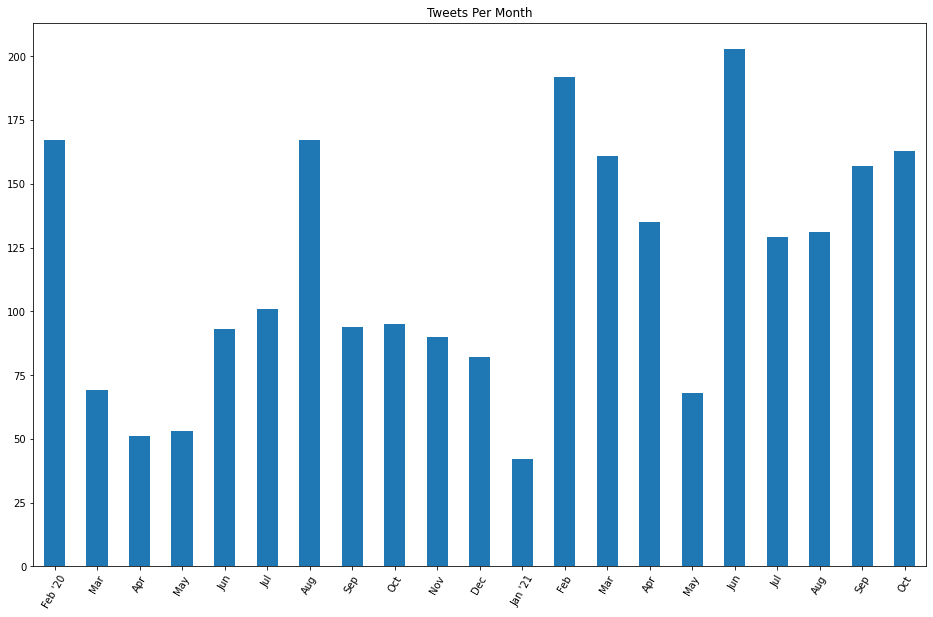

In [32]:
plt.rcParams["figure.figsize"] = (16,10);

ax = (tweets_per_month.loc[:, ["month", 'count']]
                      .plot
                      .bar(x='month', 
                           title = "Tweets Per Month", 
                           legend=False));

months = ("Feb '20", "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep",
          "Oct", "Nov", "Dec", "Jan '21", "Feb", "Mar", 'Apr', 'May',
          'Jun', 'Jul', 'Aug', "Sep", "Oct")

positions = range(len(months))
plt.xticks(positions, months, rotation=60)
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

## Followers by Month

In [33]:
followers_per_month = df_full.groupby(['year','month'])['followersCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
followers_per_month = pd.DataFrame(followers_per_month)
followers_per_month.columns = ['year', 'month', 'count']
followers_per_month

,year,month,count
0,2020,2,475780
1,2020,3,261456
2,2020,4,202486
3,2020,5,235882
4,2020,6,277777
5,2020,7,257719
6,2020,8,343846
7,2020,9,251394
8,2020,10,283458
9,2020,11,184855


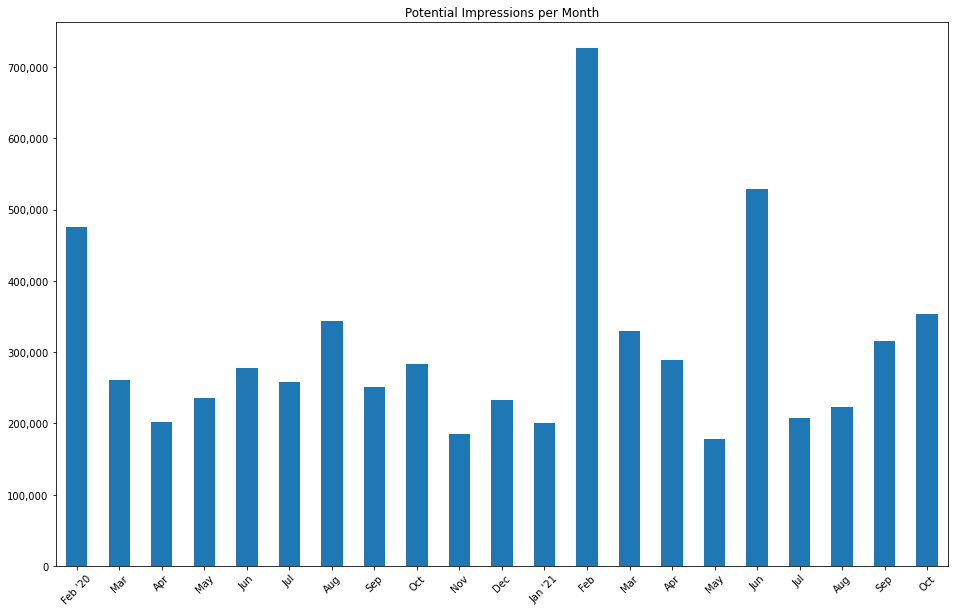

In [34]:
audience = (followers_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Potential Impressions per Month"))

audience.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

audience.figure.savefig('plots/impression_per_month.png')

## Tweets By Day

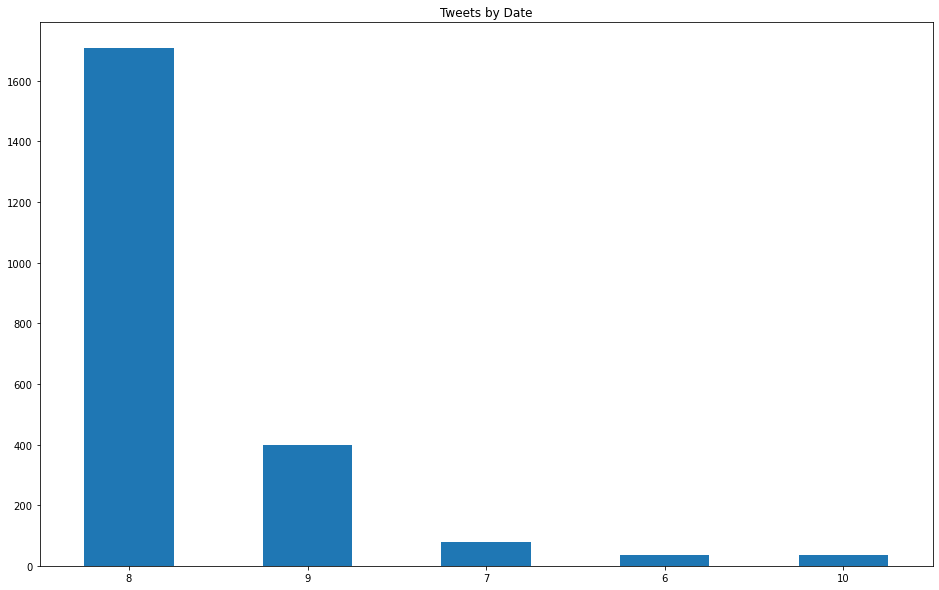

In [35]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

### Retweets per Month

In [36]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

In [37]:
retweets_per_month

,year,month,count
0,2020,2,519
1,2020,3,174
2,2020,4,112
3,2020,5,127
4,2020,6,210
5,2020,7,277
6,2020,8,392
7,2020,9,200
8,2020,10,222
9,2020,11,146


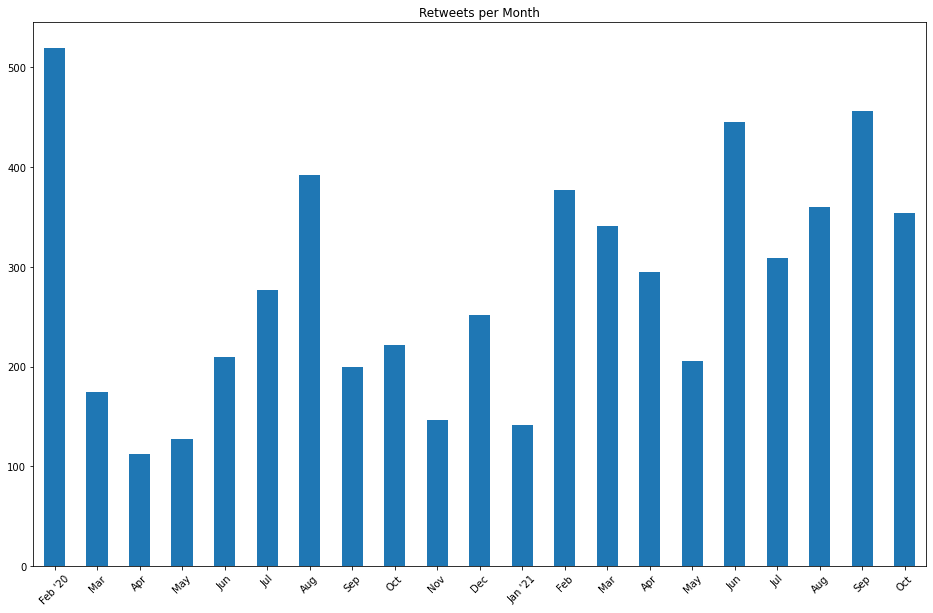

In [38]:
ax3 = (retweets_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Retweets per Month"))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax3.figure.savefig('plots/retweets_per_month.png')

## Favorites Per Month

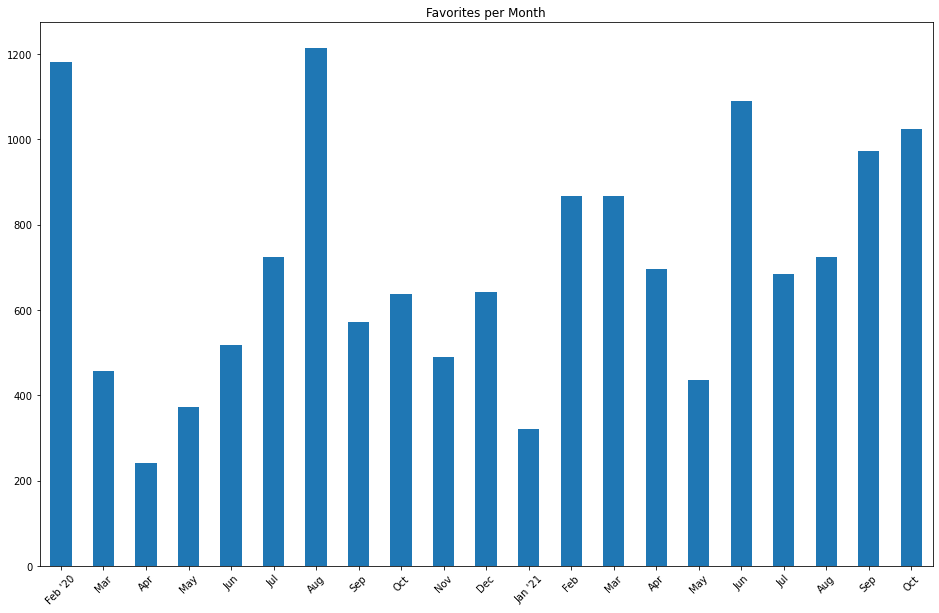

In [39]:
favorites_per_month = df_full.groupby(['year','month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

## Unique Users per Month

In [40]:
uniques_per_month = df_full.groupby([df_full['date'].dt.year.rename('year'), df_full['date'].dt.month.rename('month')])['username'].nunique().rename('count')
uniques_per_month = pd.DataFrame(uniques_per_month).reset_index()
uniques_per_month

,year,month,count
0,2020,2,90
1,2020,3,38
2,2020,4,27
3,2020,5,31
4,2020,6,54
5,2020,7,58
6,2020,8,70
7,2020,9,49
8,2020,10,47
9,2020,11,37


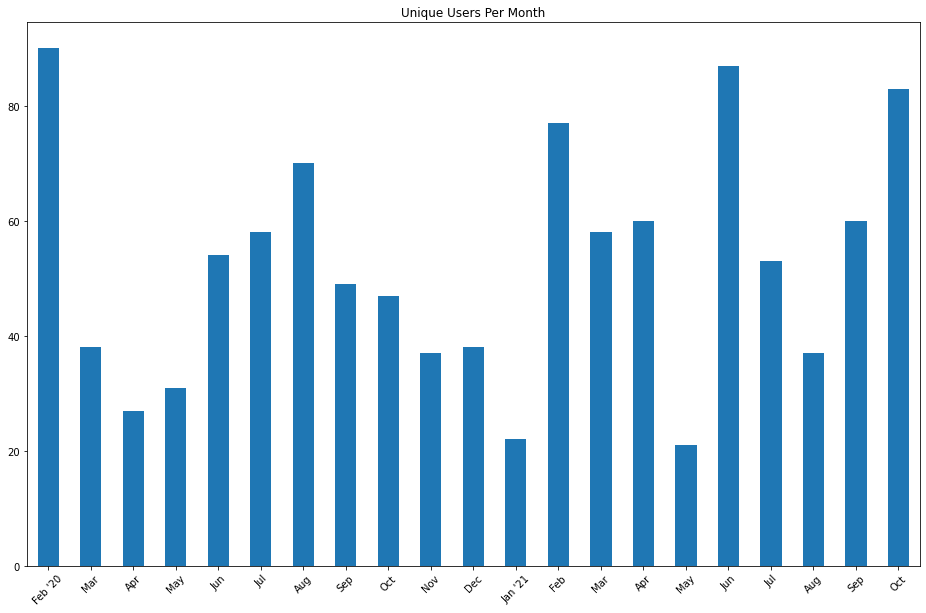

In [41]:
ax5 = (uniques_per_month.loc[:, ["month", 'count']]
                        .plot
                        .bar(x='month', 
                             title = "Unique Users Per Month", 
                             legend=False));

plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax5.figure.savefig('plots/uniques_per_month.png')

## Participants by Country

In [42]:
table = df_full.groupby(['year','month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [43]:
table_wide = table.pivot(index=['year', 'month'], columns=['country'], values=['total']).fillna(method='ffill', axis=0).reset_index()
table_wide.fillna(0, inplace=True)

In [44]:
table_wide.reset_index()

index  year month     total                                        \
country                   Australia Canada Croatia Czech Republic Ecuador   
0           0  2020     2       5.0    5.0     1.0            0.0     0.0   
1           1  2020     3       5.0    5.0     1.0            0.0     1.0   
2           2  2020     4       6.0    5.0     1.0            0.0     1.0   
3           3  2020     5       6.0    6.0     1.0            0.0     1.0   
4           4  2020     6       6.0    7.0     1.0            0.0     1.0   
5           5  2020     7       6.0    9.0     1.0            0.0     1.0   
6           6  2020     8       6.0   18.0     1.0            0.0     1.0   
7           7  2020     9       6.0   22.0     1.0            0.0     1.0   
8           8  2020    10       6.0   22.0     1.0            0.0     1.0   
9           9  2020    11       6.0   29.0     1.0            0.0     1.0   
10         10  2020    12       6.0   35.0     1.0            0.0     1.0   
11         11  2021     1       6.0   36.0     1.0            0.0     1.0   
12         12  2021     2       6.0   48.0     1.0            0.0     1.0   
13         13  2021     3       6.0   54.0     1.0            0.0     1.0   
14         14  2021     4       6.0   61.0     1.0            0.0     1.0   
15         15  2021     5       6.0   65.0     1.0            0.0     1.0   
16         16  2021     6       6.0   70.0     1.0            0.0     1.0   
17         17  2021     7       6.0   71.0     1.0            1.0     1.0   
18         18  2021     8       6.0   72.0     1.0            1.0     1.0   
19         19  2021     9       6.0   76.0     1.0            1.0     1.0   
20         20  2021    10       6.0   79.0     1.0            1.0     1.0   

                        ...                                                \
country France Germany  ... Nigeria Poland South Africa South Korea Spain   
0          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
1          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
2          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
3          0.0     1.0  ...     0.0    0.0          0.0         0.0   0.0   
4          0.0     2.0  ...     3.0    0.0          0.0         0.0   0.0   
5          2.0     4.0  ...     4.0    2.0          0.0         0.0   5.0   
6          2.0     4.0  ...     4.0    4.0          0.0         0.0   5.0   
7          2.0     4.0  ...     4.0    4.0          0.0         0.0   7.0   
8          2.0     4.0  ...     4.0    4.0          0.0         0.0  11.0   
9          2.0     4.0  ...     4.0    4.0          0.0         0.0  11.0   
10         2.0     6.0  ...     4.0    4.0          0.0         0.0  11.0   
11         2.0     6.0  ...     4.0    4.0          0.0         0.0  11.0   
12         2.0     6.0  ...     4.0    4.0          0.0        13.0  11.0   
13         2.0     6.0  ...     4.0    4.0          0.0        17.0  11.0   
14         2.0     7.0  ...     4.0    4.0          0.0        25.0  11.0   
15         2.0     7.0  ...     4.0    4.0          0.0        25.0  11.0   
16         2.0     8.0  ...     4.0    4.0          0.0        29.0  12.0   
17         2.0     8.0  ...     4.0    4.0          0.0        32.0  12.0   
18         2.0     9.0  ...     4.0    4.0          0.0        32.0  12.0   
19         2.0     9.0  ...     4.0    4.0          2.0        34.0  12.0   
20         2.0     9.0  ...     4.0    4.0          2.0        38.0  12.0   

                                                                          
country Sweden United Arab Emirates United Kingdom United States Vanuatu  
0          0.0                  0.0           13.0          73.0     0.0  
1          0.0                  0.0           20.0         108.0     0.0  
2          0.0                  0.0           24.0         133.0     0.0  
3          0.0                  0.0           33.0         159.0     0.0  
4          0.0

In [45]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [46]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [47]:
table_wide.columns

Index(['', '', 'Australia', 'Canada', 'Croatia', 'Czech Republic', 'Ecuador',
       'France', 'Germany', 'India', 'Ireland', 'Italy', 'Malaysia',
       'New Zealand', 'Nigeria', 'Poland', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vanuatu'],
      dtype='object')

In [48]:
table_wide.columns.values[[0, 1]] = ['year', 'month']

In [49]:
table_wide

,year,month,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,2,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
0,2020,2,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0
4,2020,6,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [50]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
# df['col1'].replace(di, inplace=True)
table_wide['month'] = table_wide['month'].replace(months_dic)
table_wide

,year,month,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
0,2020,February,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
0,2020,February,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0
4,2020,June,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [51]:
table_wide['month_year'] = table_wide['month']+" "+table_wide['year'].astype(str)
table_wide = table_wide.drop(columns=['month', 'year'])

In [52]:
table_wide.set_index('month_year')

,Australia,Canada,Croatia,Czech Republic,Ecuador,France,Germany,India,Ireland,Italy,...,Nigeria,Poland,South Africa,South Korea,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu
month_year,,,,,,,,,,,,,,,,,,,,,
February 2020,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
February 2020,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,73.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,108.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,133.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
May 2020,6.0,6.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,159.0,0.0
June 2020,6.0,7.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,200.0,0.0


In [55]:
# bcr.bar_chart_race(table_wide)

In [56]:
table_wide.columns
# df.query('col1 <= 1 & 1 <= col1')

Index(['Australia', 'Canada', 'Croatia', 'Czech Republic', 'Ecuador', 'France',
       'Germany', 'India', 'Ireland', 'Italy', 'Malaysia', 'New Zealand',
       'Nigeria', 'Poland', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Vanuatu',
       'month_year'],
      dtype='object')

In [58]:
current = df_full.query('year == 2021 & month == 10')

In [59]:
print(current.username.unique())
print(current.username.nunique())

['thatangellove' 'chainofbeing' 'greenhorizonpod' 'CaseyBroda' 'bl_save'
 'bwbastards' 'shellyleslie' 'realnealveglio' 'StoriesSandman'
 'OracleofDusk' 'DixieProle' 'inspiredenergyM' 'evo_terra'
 'HealthTalksPod' 'TijuanaEstuary' 'kemp_travis' 'ShockedApplaud'
 'CasualBirderPod' 'yankeekiwi' 'SkincareAnarchy' 'RussophilesU'
 'SteveStewartMe' 'bhhcast' 'fableandfolly' 'CivilizedPod' 'mistyphillip'
 'KnowItSomePod' 'need_3_mugs' 'PodDemastered' 'RebelsReinvent'
 'mckeephoto' 'Podchaser' 'reelfilmpkc' 'tj_melanie' 'craftedquillpod'
 'TheIndustry13' 'TheVibePodcast4' 'wkeithtims' 'TheDovBaron'
 'HolicsUmbrella' 'StrangeAirPod' 'yeoldecrimepod' 'tfyhpodcast'
 'Lakesider92' 'podcasting_jp' 'Zed1Pod' 'Podcasteroid' 'schisnell'
 'Podhero' 'redditonwiki' 'musciguy' 'SquadCastFM' 'arithisandthat'
 'Fog_Cast' 'wafflingTaylors' 'musicpodcasts' 'BarkerMcIntosh'
 'Newtonsdarkroom' 'MurderousRoots' 'briannajeans' 'TheHiredSwords'
 'curichildpod' 'FaeforgeAcademy' 'lovecastpodcast' 'podcastday'
 'Good

In [60]:
current.country.unique()

array(['United States', nan, 'Ireland', 'United Kingdom', 'South Korea',
       'Canada', 'New Zealand'], dtype=object)

In [61]:
current.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'year', 'month', 'day'],
      dtype='object')

In [62]:
current.shape

(163, 36)

In [63]:
current.loc[0, 'outlinks']

"['https://www.podchaser.com/podcasts/clearing-chaos-1968570']"